<a href="https://colab.research.google.com/github/nandana-03/Heart-Disease-Prediction-System/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

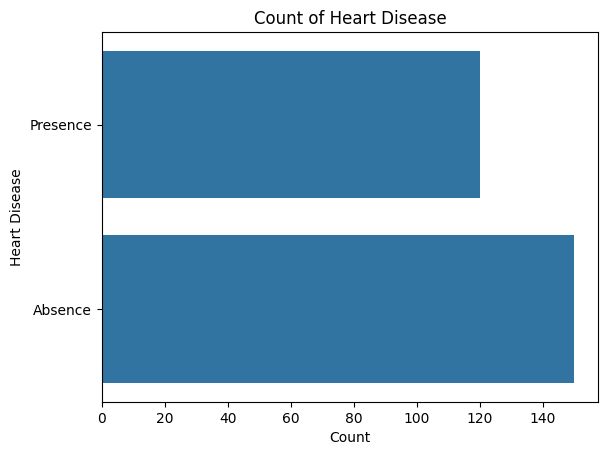

In [ ]:
sns.countplot(df['Heart Disease'])
plt.ylabel('Heart Disease')
plt.xlabel('Count')
plt.title('Count of Heart Disease')
plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape

(270, 13)

In [ ]:
y.shape

(270,)

In [ ]:
y.replace({"Absence": 0, "Presence": 1}, inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 99)

**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10, random_state=10)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=10)

In [ ]:
X_train.shape

(216, 13)

In [ ]:
y_train.shape

(216,)

In [ ]:
clf.feature_importances_

array([0.06286439, 0.03785471, 0.15982586, 0.04946011, 0.05043436,
       0.00580725, 0.0086222 , 0.08354915, 0.03200771, 0.11912041,
       0.06919858, 0.15097601, 0.17027927])

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
print(y_test.head())

26     0
32     0
222    0
106    0
153    0
Name: Heart Disease, dtype: int64


In [ ]:

confusion_matrix(y_test,y_pred)

array([[26,  8],
       [ 4, 16]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7777777777777778

In [ ]:
cross_val_score(clf,X_train,y_train,cv=10)

array([0.81818182, 0.95454545, 0.81818182, 0.90909091, 0.86363636,
       0.63636364, 0.9047619 , 0.76190476, 0.76190476, 0.95238095])

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.80      0.67      0.73        24

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.77        54



In [ ]:
input_data = (46,1,4,140,311,0,0,120,1,1.8,2,2,7)
numpy_array = np.asarray(input_data)
reshaped_array = numpy_array.reshape(1,-1)
prediction = clf.predict(reshaped_array)
print(prediction)

if(prediction[0] == 'Absence'):
  print("The person does not have a Heart Disease")
else:
  print("The person has a Heart Disease")

[1]
The person has a Heart Disease


**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
input_data =  (46,1,4,140,311,0,0,120,1,1.8,2,2,7)
numpy_array = np.asarray(input_data)
reshaped_array = numpy_array.reshape(1,-1)
prediction = model.predict(reshaped_array)
print(prediction)

if(prediction[0] == 'Absence'):
  print("The person does not have a Heart Disease")
else:
  print("The person has a Heart Disease")

[1]
The person has a Heart Disease


In [ ]:
X.shape

(270, 13)

In [ ]:
y.shape

(270,)

**KNN Classification**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8148148148148148
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



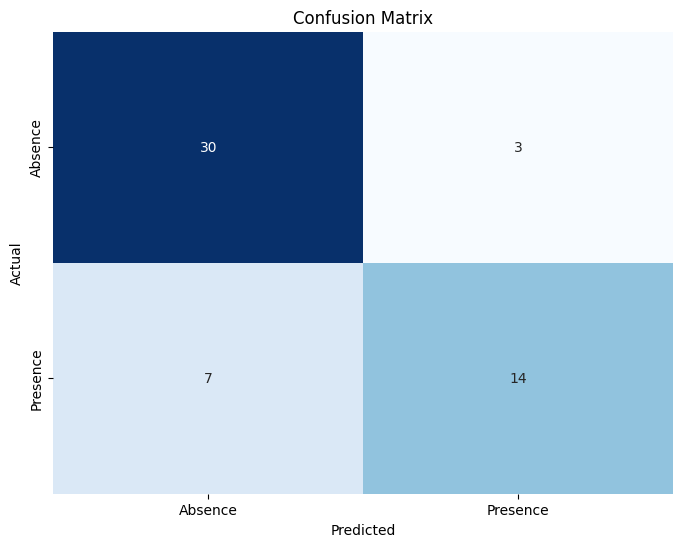

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Absence', 'Presence'])
plt.yticks(ticks=[0.5, 1.5], labels=['Absence', 'Presence'])
plt.show()

**Linear Regression**


In [ ]:
X = df.drop(df.columns[4], axis=1)
y = df.iloc[:,4]
print(y)

0      322
1      564
2      261
3      263
4      269
      ... 
265    199
266    263
267    294
268    192
269    286
Name: Cholesterol, Length: 270, dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2520.9433000555264
